In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('E:\DataScience\Data\MovieLens\ml-latest-small\movies.csv')
#movies = movies.sample(10000)

In [3]:
movies.shape

(9742, 3)

In [4]:
movies['genres'] = movies['genres'].str.replace('|',' ')

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.movieId.nunique()

9742

In [7]:
tags = pd.read_csv('E:\DataScience\Data\MovieLens\ml-latest-small\\tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [8]:
tags= tags.drop(columns=['timestamp'])
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   userId   3683 non-null   int64 
 1   movieId  3683 non-null   int64 
 2   tag      3683 non-null   object
dtypes: int64(2), object(1)
memory usage: 86.4+ KB


In [9]:
tags.dropna(inplace=True)

In [10]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3683 entries, 0 to 3682
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   userId   3683 non-null   int64 
 1   movieId  3683 non-null   int64 
 2   tag      3683 non-null   object
dtypes: int64(2), object(1)
memory usage: 115.1+ KB


In [11]:
tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [12]:
tags = pd.DataFrame(tags.groupby(['movieId'])['tag'].apply(lambda x:' '.join((x))))

In [13]:
tags.head()

,tag
movieId,
1,pixar pixar fun
2,fantasy magic board game Robin Williams game
3,moldy old
5,pregnancy remake
7,remake


In [14]:
movies.shape

(9742, 3)

In [15]:
tags.shape

(1572, 1)

In [16]:
ratings = pd.read_csv('E:\DataScience\Data\MovieLens\ml-latest-small\\ratings.csv')
ratings.shape

(100836, 4)

In [17]:
ratings=ratings.drop(columns=['timestamp'])

In [18]:
user_ratings = ratings.groupby('userId').filter(lambda x:len(x) >= 55)

In [54]:
movies = movies[movies.movieId.isin(user_ratings.movieId.unique().tolist())]
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy
9738,193583,No Game No Life: Zero (2017),Animation Comedy Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action Animation


In [20]:
movie_data= pd.merge(movies,tags,how='left',on='movieId')

In [48]:
movie_data.head()

,movieId,title,genres,tag,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,pixar pixar fun,Adventure Animation Children Comedy Fantasy pi...
1,2,Jumanji (1995),Adventure Children Fantasy,fantasy magic board game Robin Williams game,Adventure Children Fantasy fantasy magic board...
2,3,Grumpier Old Men (1995),Comedy Romance,moldy old,Comedy Romance moldy old
3,4,Waiting to Exhale (1995),Comedy Drama Romance,,Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake,Comedy pregnancy remake


In [21]:
movie_data.fillna('',inplace=True)

In [22]:
movie_data.isnull().any()

movieId    False
title      False
genres     False
tag        False
dtype: bool

In [23]:
movie_data['metadata'] = movie_data[['genres','tag']].apply(lambda x:' '.join(x),axis = 1)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movie_data['metadata'])

In [26]:
tfidf_matrix_df=pd.DataFrame(tfidf_matrix.toarray())

In [27]:
tfidf_matrix_df.shape

(9625, 1675)

In [28]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [29]:
tsvd = TruncatedSVD(n_components=200)
latent_matrix1 = tsvd.fit_transform(tfidf_matrix_df)
#latent_matrix1 ------> content based

In [30]:
latent_matrix1.shape

(9625, 200)

In [31]:
explained_var = tsvd.explained_variance_ratio_.cumsum()

In [32]:
tsvd.explained_variance_.sum()

0.7933513916769701

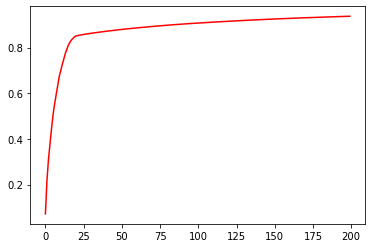

In [33]:
plt.plot(explained_var,color = 'red')

In [34]:
latent_matrix1_df = pd.DataFrame(latent_matrix1,index=movie_data.title.to_list())

In [35]:
latent_matrix1_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),0.102600,0.082370,0.069459,0.091250,-0.151136,0.012090,0.234567,-0.019392,-0.124586,-0.008614,...,0.160239,0.219019,0.102033,0.032553,0.043449,-0.148367,-0.087879,-0.038493,-0.124181,0.034824
Jumanji (1995),0.032689,0.008539,0.059189,0.091842,-0.106015,0.007100,0.189676,-0.012325,-0.078054,0.001669,...,-0.006395,-0.007602,0.000644,-0.002692,0.002092,-0.006765,0.023887,0.003186,-0.002282,-0.010560
Grumpier Old Men (1995),0.148118,0.105052,-0.042318,0.121888,0.098552,-0.040117,-0.011973,0.000952,0.004727,-0.002093,...,-0.010866,-0.007915,-0.001521,-0.001378,-0.004769,-0.001713,0.006302,0.009673,0.002071,-0.010356
Waiting to Exhale (1995),0.824508,0.064191,-0.292164,0.377882,0.274419,-0.082577,-0.046063,0.001273,0.028399,-0.000377,...,-0.000003,-0.000257,-0.000013,-0.000131,-0.000073,-0.000095,0.000072,-0.000262,-0.000021,-0.000062
Father of the Bride Part II (1995),0.113317,0.120747,-0.006328,-0.037081,-0.007424,0.010526,-0.009221,-0.001934,0.004463,-0.011439,...,-0.011768,0.018623,0.000261,0.008719,0.004859,-0.004455,-0.003967,0.002893,0.007447,-0.003825


In [36]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [37]:
user_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [38]:
ratings1 = pd.merge(movies[['movieId']],user_ratings,on='movieId',how='right')

In [52]:
user_ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [51]:
movies[['movieId']]

,movieId
0,1
1,2
2,3
3,4
4,5
...,...
9737,193581
9738,193583
9739,193585
9740,193587


In [40]:
ratings1.isna().any()

movieId    False
userId     False
rating     False
dtype: bool

In [55]:
ratings_pivot = ratings1.pivot_table(index='movieId',columns='userId',values='rating').fillna(0)

In [56]:
ratings_pivot

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
ratings_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9625 entries, 1 to 193609
Columns: 364 entries, 1 to 610
dtypes: float64(364)
memory usage: 26.8 MB


In [57]:
from sklearn.decomposition import TruncatedSVD

In [58]:
tsv = TruncatedSVD(n_components=200)
latent_matrix2 = tsv.fit_transform(ratings_pivot)
#latent_matrix2 --------> item based collaberative filtering

In [67]:
latent_matrix2_df = pd.DataFrame(latent_matrix2,index=movie_data.title.to_list())

In [68]:
latent_matrix2_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),36.391240,-4.958788,14.331820,1.844157,-3.077922,-1.351171,8.341427,-0.561086,-1.898202,1.657846,...,0.047830,-2.523931,0.758389,0.641742,-0.347134,1.330474,-1.750053,-0.788588,-0.761070,-0.727372
Jumanji (1995),20.447499,0.675231,11.354479,-7.325453,-3.505243,3.585610,4.393397,-5.564559,0.434467,0.351433,...,-0.305134,-1.378213,1.668344,-0.347687,-0.067727,-1.681321,-0.100146,0.435212,0.633735,1.418061
Grumpier Old Men (1995),8.407816,-5.190801,4.378314,-6.189039,-0.333121,1.924149,-1.548363,0.795945,-3.196044,2.121788,...,-0.016981,-0.333123,-0.104446,0.347305,-1.074625,0.565407,0.930285,0.634907,-1.029381,0.373572
Waiting to Exhale (1995),0.408037,-0.664700,0.739903,-0.202676,-0.498374,1.055408,0.184081,-0.508293,-0.429505,0.086538,...,0.071961,0.139087,0.316930,-0.032544,0.161765,0.086866,-0.180623,-0.202819,0.178335,0.047532
Father of the Bride Part II (1995),5.755079,-1.757369,3.961287,-3.673278,-3.688047,3.237859,1.140585,-0.690786,-2.171825,1.365960,...,0.168626,0.220249,0.101422,0.376640,1.043888,0.476111,0.725247,0.215080,0.377243,0.018502


In [65]:
latent_matrix1_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),0.102600,0.082370,0.069459,0.091250,-0.151136,0.012090,0.234567,-0.019392,-0.124586,-0.008614,...,0.160239,0.219019,0.102033,0.032553,0.043449,-0.148367,-0.087879,-0.038493,-0.124181,0.034824
Jumanji (1995),0.032689,0.008539,0.059189,0.091842,-0.106015,0.007100,0.189676,-0.012325,-0.078054,0.001669,...,-0.006395,-0.007602,0.000644,-0.002692,0.002092,-0.006765,0.023887,0.003186,-0.002282,-0.010560
Grumpier Old Men (1995),0.148118,0.105052,-0.042318,0.121888,0.098552,-0.040117,-0.011973,0.000952,0.004727,-0.002093,...,-0.010866,-0.007915,-0.001521,-0.001378,-0.004769,-0.001713,0.006302,0.009673,0.002071,-0.010356
Waiting to Exhale (1995),0.824508,0.064191,-0.292164,0.377882,0.274419,-0.082577,-0.046063,0.001273,0.028399,-0.000377,...,-0.000003,-0.000257,-0.000013,-0.000131,-0.000073,-0.000095,0.000072,-0.000262,-0.000021,-0.000062
Father of the Bride Part II (1995),0.113317,0.120747,-0.006328,-0.037081,-0.007424,0.010526,-0.009221,-0.001934,0.004463,-0.011439,...,-0.011768,0.018623,0.000261,0.008719,0.004859,-0.004455,-0.003967,0.002893,0.007447,-0.003825


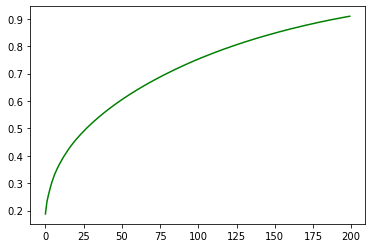

In [63]:
explained_varian = tsv.explained_variance_ratio_.cumsum()
plt.plot(explained_varian,color='green')

In [69]:
from sklearn.metrics.pairwise import cosine_similarity

In [70]:
latent_matrix1_df.loc['Toy Story (1995)']

0      0.102600
1      0.082370
2      0.069459
3      0.091250
4     -0.151136
         ...   
195   -0.148367
196   -0.087879
197   -0.038493
198   -0.124181
199    0.034824
Name: Toy Story (1995), Length: 200, dtype: float64

In [72]:
import numpy as np

In [82]:
movie_vector_content = np.array(latent_matrix1_df.loc['Toy Story (1995)']).reshape(1,-1)

In [80]:
movie_vector_collab = np.array(latent_matrix2_df.loc['Toy Story (1995)']).reshape(1,-1)

In [93]:
similarity_of_contentbased = cosine_similarity(latent_matrix1_df,movie_vector_content).reshape(-1)
similarity_of_contentbased

array([ 1.00000000e+00,  1.97057349e-01,  4.51853105e-02, ...,
       -3.78329216e-05,  1.82439398e-01,  1.15038558e-01])

In [109]:
similarity_of_collab_based = cosine_similarity(latent_matrix2_df,movie_vector_collab).reshape(-1)
similarity_of_collab_based

array([ 1.        ,  0.50373588,  0.34937656, ..., -0.01138811,
       -0.01138811,  0.00527345])

In [110]:
hybrid = (similarity_of_contentbased +similarity_of_collab_based)/2

In [118]:
dictDf = {'content':similarity_of_contentbased,'collaborative':similarity_of_collab_based,'hybrid':hybrid}
dictDf

{'content': array([ 1.00000000e+00,  1.97057349e-01,  4.51853105e-02, ...,
        -3.78329216e-05,  1.82439398e-01,  1.15038558e-01]),
 'collaborative': array([ 1.        ,  0.50373588,  0.34937656, ..., -0.01138811,
        -0.01138811,  0.00527345]),
 'hybrid': array([ 1.        ,  0.35039661,  0.19728093, ..., -0.00571297,
         0.08552564,  0.06015601])}

In [119]:
similar_movies = pd.DataFrame(dictDf,index=latent_matrix1_df.index)
similar_movies

,content,collaborative,hybrid
Toy Story (1995),1.000000,1.000000,1.000000
Jumanji (1995),0.197057,0.503736,0.350397
Grumpier Old Men (1995),0.045185,0.349377,0.197281
Waiting to Exhale (1995),0.057809,0.039576,0.048692
Father of the Bride Part II (1995),0.017643,0.344353,0.180998
...,...,...,...
Black Butler: Book of the Atlantic (2017),0.293659,-0.011388,0.141135
No Game No Life: Zero (2017),0.326144,-0.011388,0.157378
Flint (2017),-0.000038,-0.011388,-0.005713
Bungo Stray Dogs: Dead Apple (2018),0.182439,-0.011388,0.085526


In [120]:
similar_movies.sort_values(by='content',ascending=False)[:10]

,content,collaborative,hybrid
Toy Story (1995),1.000000,1.000000,1.000000
"Bug's Life, A (1998)",0.899631,0.593151,0.746391
Toy Story 2 (1999),0.777116,0.685313,0.731214
Up (2009),0.545507,0.428166,0.486837
The Lego Movie (2014),0.462154,0.288299,0.375227
Moana (2016),0.430956,0.063145,0.247051
Antz (1998),0.430956,0.443631,0.437293
Asterix and the Vikings (Astérix et les Vikings) (2006),0.430956,0.059368,0.245162
"Wild, The (2006)",0.430956,0.076833,0.253895
Turbo (2013),0.430956,0.099480,0.265218


In [121]:
similar_movies.sort_values(by='collaborative',ascending=False)[:10]

,content,collaborative,hybrid
Toy Story (1995),1.000000,1.000000,1.000000
Jurassic Park (1993),0.080724,0.704935,0.392829
Toy Story 2 (1999),0.777116,0.685313,0.731214
Forrest Gump (1994),0.024928,0.681134,0.353031
Shrek (2001),0.366009,0.667358,0.516683
Apollo 13 (1995),0.029400,0.659892,0.344646
Star Wars: Episode VI - Return of the Jedi (1983),0.049576,0.658691,0.354134
Star Wars: Episode IV - A New Hope (1977),0.009108,0.658414,0.333761
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),0.040772,0.642301,0.341537
Aladdin (1992),0.234484,0.640520,0.437502


In [122]:
similar_movies.sort_values(by='hybrid',ascending=False)[:10]

,content,collaborative,hybrid
Toy Story (1995),1.000000,1.000000,1.000000
"Bug's Life, A (1998)",0.899631,0.593151,0.746391
Toy Story 2 (1999),0.777116,0.685313,0.731214
"Monsters, Inc. (2001)",0.430956,0.605503,0.518230
Shrek (2001),0.366009,0.667358,0.516683
Up (2009),0.545507,0.428166,0.486837
Aladdin (1992),0.234484,0.640520,0.437502
Antz (1998),0.430956,0.443631,0.437293
Ice Age (2002),0.377460,0.481977,0.429718
Toy Story 3 (2010),0.352958,0.503409,0.428183
